<a href="https://colab.research.google.com/github/samuelAemro12/MachineLearningSchoolProject/blob/main/projectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data manipulation, analysis, and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
file_path = "/content/drive/My Drive/ml-project/breast-cancer.csv"
breast_cancer = pd.read_csv(file_path)
breast_cancer.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat:,Class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


### cheking for a missing value

In [ ]:
# Replace '?' with NaN
breast_cancer.replace('?', np.nan, inplace=True)

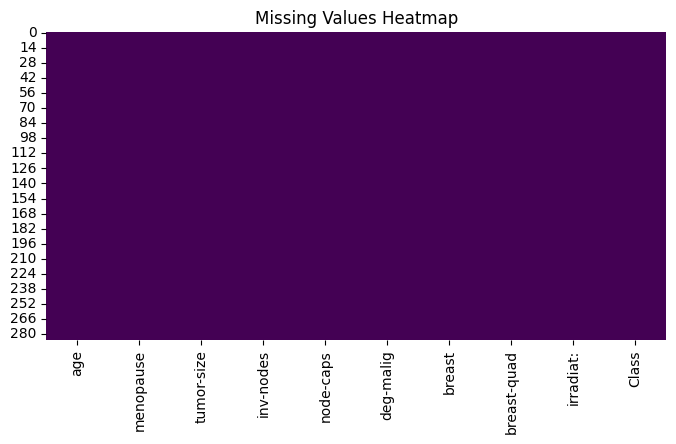

In [ ]:
# Visualize missing values
plt.figure(figsize=(8, 4))
sns.heatmap(breast_cancer.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# Handle missing values
for col in breast_cancer.columns:
    if breast_cancer[col].dtype == 'object':
        breast_cancer[col] = breast_cancer[col].fillna(breast_cancer[col].mode()[0])
    elif breast_cancer[col].isnull().sum() > 0:
        breast_cancer[col] = breast_cancer[col].fillna(breast_cancer[col].median())

In [ ]:
# Verify that missing values are handled
print("\nMissing Values After Handling:")
print(breast_cancer.isnull().sum())


Missing Values After Handling:
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat:      0
Class          0
dtype: int64


### Encoding categorical variables

In [ ]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encode all categorical columns
for col in breast_cancer.columns:
    if breast_cancer[col].dtype == 'object':
        breast_cancer[col] = le.fit_transform(breast_cancer[col])
print("\nEncoded Dataset Preview:")
print(breast_cancer.head())


Encoded Dataset Preview:
   age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0    2          2           2          0          1          2       1   
1    3          0           2          0          0          0       1   
2    3          0           6          0          0          1       0   
3    2          2           6          0          1          2       1   
4    2          2           5          4          1          1       0   

   breast-quad  irradiat:  Class  
0            2          0      1  
1            0          0      0  
2            1          0      1  
3            1          1      0  
4            4          0      1  


### Visualize feature distribution

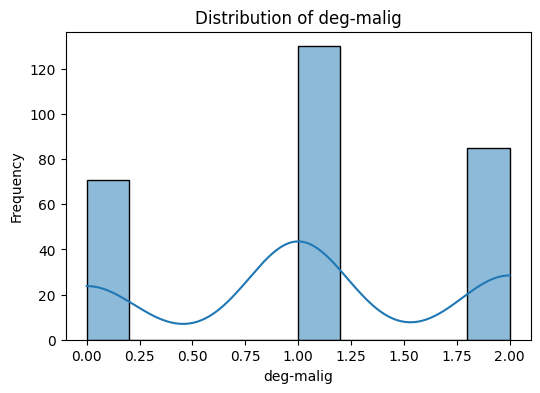

In [ ]:
# identify numerical columns
numerical_cols = ['deg-malig'] # only one numerical column in this dataset

# plot histograms for numerical features
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(breast_cancer[col], kde=True, bins = 10)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# separate features (X) and target (y)
X = breast_cancer.drop(columns=['Class'])
y = breast_cancer['Class']

### Splitting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print("\nTraining and Testing Set Shapes:")
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training and Testing Set Shapes:
Training set: (228, 9) (228,)
Testing set: (58, 9) (58,)


### Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate performance
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        40
           1       0.57      0.44      0.50        18

    accuracy                           0.72        58
   macro avg       0.67      0.65      0.65        58
weighted avg       0.71      0.72      0.71        58

Accuracy: 0.7241379310344828


### Train Naive Bayes model

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test)

# Evaluate performance
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        40
           1       0.64      0.50      0.56        18

    accuracy                           0.76        58
   macro avg       0.72      0.69      0.70        58
weighted avg       0.75      0.76      0.75        58

Accuracy: 0.7586206896551724


### Train SVM (Support Vector Machine) model

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))
print("Accuracy:", accuracy_score(y_test, svm_pred))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        40
           1       0.64      0.39      0.48        18

    accuracy                           0.74        58
   macro avg       0.70      0.64      0.66        58
weighted avg       0.73      0.74      0.72        58

Accuracy: 0.7413793103448276


### Comparing Accuracies


Model Comparison:
           Model  Accuracy
0  Random Forest  0.724138
1    Naive Bayes  0.758621
2            SVM  0.741379


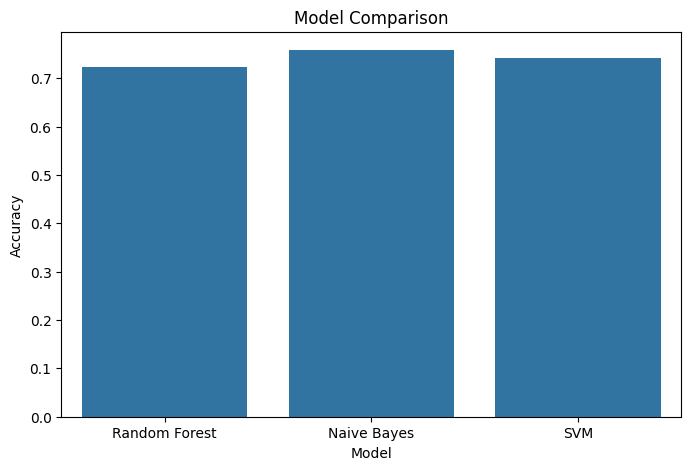

In [ ]:
models = ['Random Forest', 'Naive Bayes', 'SVM']
accuracies = [
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, svm_pred)
]

# Create a DataFrame for comparison
performance_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
print("\nModel Comparison:")
print(performance_df)

# Visualize the comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=performance_df)
plt.title('Model Comparison')
plt.show()